# Hospital Data Visualization 2

## Importing required libraries

In [1]:
# Library for modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
# Library to see the training models
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import warnings

warnings.filterwarnings('ignore')
# look at the first ten thousand bytes to guess the character encoding
with open('02.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': None, 'confidence': 0.0, 'language': None}


## Reading the Data

In [2]:
df_medicacion=pd.read_csv('02.csv',sep=';',encoding='ISO-8859-1') 

In [3]:
df_medicacion.head(15)

PATIENT ID FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME  \
0            1             MORFINA amp 1% 1 mL (10 mg/1 mL)   
1            1                         DOLQUINE comp 200 mg   
2            1                         PARACETAMOL comp 1 g   
3            1              KALETRA/ALUVIA comp (200+50) mg   
4            1           DESINCLOR JABONOSO sol 4% F/500 mL   
5            1                      CEFTRIAXONA vial IV 1 g   
6            1                     MIDAZOLAM amp 15 mg/3 mL   
7            1                               OXIGENO PLANTA   
8            1                     SOLU-MODERIN vial 500 mg   
9            1                 METILPREDNISOLONA vial 20 mg   
10           1                 METILPREDNISOLONA vial 40 mg   
11           1                   HIBOR jer 3.500 UI/ 0,2 mL   
12           1                    HIBOR jer 7.500 UI/0,3 mL   
13           1                     CLEXANE jer 20 mg/0,2 mL   
14           1                          OMEPRAZOL cap 20 mg   

    DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE INICIO_TRAT/DRUG_START_DATE  \
0                                    5                  2020-04-10   
1                                    2                  2020-04-06   
2                                    3                  2020-04-07   
3                                    4                  2020-04-07   
4                                    2                  2020-04-06   
5                                    2                  2020-04-06   
6                                    2                  2020-04-10   
7                                   20                  2020-04-06   
8                                    1                  2020-04-07   
9                                    2                  2020-04-09   
10                                  12                  2020-04-09   
11                                   1                  2020-04-07   
12                                   1                  2020-04-08   
13                                   2                  2020-04-07   
14                                   1                  2020-04-06   

   FIN_TRAT/DRUG_END_DATE                                   ATC5_NOMBRE/NAME  \
0              2020-04-10                      ALCALOIDES NATURALES DEL OPIO   
1              2020-04-10                                    AMINOQUINOLINAS   
2              2020-04-10                                           ANILIDAS   
3              2020-04-07  ANTIVIRALES PARA EL TRATAMIENTO DE INFECCIONES...   
4              2020-04-06                              BIGUANIDAS Y AMIDINAS   
5              2020-04-11            CEFALOSPORINAS DE LA TERCERA GENERACIàN   
6              2020-04-10                     DERIVADOS DE LA BENZODIAZEPINA   
7              2020-04-10                                  GASES MEDICINALES   
8              2020-04-08                                   GLUCOCORTICOIDES   
9              2020-04-09                                   GLUCOCORTICOIDES   
10             2020-04-09                                   GLUCOCORTICOIDES   
11             2020-04-08                               GRUPO DE LA HEPARINA   
12             2020-04-11                               GRUPO DE LA HEPARINA   
13             2020-04-08                               GRUPO DE LA HEPARINA   
14             2020-04-10                INHIBIDORES DE LA BOMBA DE PROTONES   

   ID_ATC5       ATC7_NOMBRE/NAME  ID_ATC7  
0    N02AA                MORFINA  N02AA01  
1    P01BA      HIDROXICLOROQUINA  P01BA02  
2    N02BE            PARACETAMOL  N02BE01  
3    J05AR  RITONAVIR Y LOPINAVIR  J05AE20  
4    D08AC           CLORHEXIDINA  D08AC02  
5    J01DD            CEFTRIAXONA  J01DD04  
6    N05CD              MIDAZOLAM  N05CD08  
7    V03AN                OXÖGENO  V03AN01  
8    H02AB      METILPREDNISOLONA  H02AB04  
9    H02AB      METILPREDNISOLONA  H02AB04  
10   H02AB      METILPREDNISOLONA  H02AB04  
11   B01AB             BEMIPARINA  B01AB12  
12   B01

## Checking the Data

In [4]:
df_medicacion.isna().sum()

PATIENT ID                                      0
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME    0
DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE              0
INICIO_TRAT/DRUG_START_DATE                     0
FIN_TRAT/DRUG_END_DATE                          0
ATC5_NOMBRE/NAME                                0
ID_ATC5                                         0
ATC7_NOMBRE/NAME                                2
ID_ATC7                                         2
dtype: int64

In [5]:
df_medicacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60460 entries, 0 to 60459
Data columns (total 9 columns):
PATIENT ID                                      60460 non-null int64
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME    60460 non-null object
DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE              60460 non-null int64
INICIO_TRAT/DRUG_START_DATE                     60460 non-null object
FIN_TRAT/DRUG_END_DATE                          60460 non-null object
ATC5_NOMBRE/NAME                                60460 non-null object
ID_ATC5                                         60460 non-null object
ATC7_NOMBRE/NAME                                60458 non-null object
ID_ATC7                                         60458 non-null object
dtypes: int64(2), object(7)
memory usage: 4.2+ MB


In [6]:
df_medicacion.shape

(60460, 9)

## Feature Exploration

In [7]:
#Creamos copia para no destrozar los datos originales
result = df_medicacion.copy()

In [8]:
#Tienen relacion directa por lo que podemos obviar dichas variables
result.drop(['ID_ATC5','ID_ATC7'],axis=1, inplace=True)

In [9]:
#Rellenamos los 4 unicos datos vacios que corresponde a medicamentos sin clasificar
result['ATC7_NOMBRE/NAME']=result['ATC7_NOMBRE/NAME'].fillna("SIN CLASIFICAR")

In [10]:
result.isna().sum()

PATIENT ID                                      0
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME    0
DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE              0
INICIO_TRAT/DRUG_START_DATE                     0
FIN_TRAT/DRUG_END_DATE                          0
ATC5_NOMBRE/NAME                                0
ATC7_NOMBRE/NAME                                0
dtype: int64

In [11]:
#Guardamos una copia csv de los datos limpiados
result.to_csv("DataFrame2_Limpio.csv",sep=';')

In [12]:
#Correspondiente tipo de dato
result['INICIO_TRAT/DRUG_START_DATE']= pd.to_datetime(result['INICIO_TRAT/DRUG_START_DATE'])
result['FIN_TRAT/DRUG_END_DATE']= pd.to_datetime(result['FIN_TRAT/DRUG_END_DATE']) 

In [13]:
#Simplicamos a un variable dias tratados
result['DATE'] = result['FIN_TRAT/DRUG_END_DATE'] - result['INICIO_TRAT/DRUG_START_DATE']
result.head(10)

PATIENT ID FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME  \
0           1             MORFINA amp 1% 1 mL (10 mg/1 mL)   
1           1                         DOLQUINE comp 200 mg   
2           1                         PARACETAMOL comp 1 g   
3           1              KALETRA/ALUVIA comp (200+50) mg   
4           1           DESINCLOR JABONOSO sol 4% F/500 mL   
5           1                      CEFTRIAXONA vial IV 1 g   
6           1                     MIDAZOLAM amp 15 mg/3 mL   
7           1                               OXIGENO PLANTA   
8           1                     SOLU-MODERIN vial 500 mg   
9           1                 METILPREDNISOLONA vial 20 mg   

   DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE INICIO_TRAT/DRUG_START_DATE  \
0                                   5                  2020-04-10   
1                                   2                  2020-04-06   
2                                   3                  2020-04-07   
3                                   4                  2020-04-07   
4                                   2                  2020-04-06   
5                                   2                  2020-04-06   
6                                   2                  2020-04-10   
7                                  20                  2020-04-06   
8                                   1                  2020-04-07   
9                                   2                  2020-04-09   

  FIN_TRAT/DRUG_END_DATE                                   ATC5_NOMBRE/NAME  \
0             2020-04-10                      ALCALOIDES NATURALES DEL OPIO   
1             2020-04-10                                    AMINOQUINOLINAS   
2             2020-04-10                                           ANILIDAS   
3             2020-04-07  ANTIVIRALES PARA EL TRATAMIENTO DE INFECCIONES...   
4             2020-04-06                              BIGUANIDAS Y AMIDINAS   
5             2020-04-11            CEFALOSPORINAS DE LA TERCERA GENERACIàN   
6             2020-04-10                     DERIVADOS DE LA BENZODIAZEPINA   
7             2020-04-10                                  GASES MEDICINALES   
8             2020-04-08                                   GLUCOCORTICOIDES   
9             2020-04-09                                   GLUCOCORTICOIDES   

        ATC7_NOMBRE/NAME   DATE  
0                MORFINA 0 days  
1      HIDROXICLOROQUINA 4 days  
2            PARACETAMOL 3 days  
3  RITONAVIR Y LOPINAVIR 0 days  
4           CLORHEXIDINA 0 days  
5            CEFTRIAXONA 5 days  
6              MIDAZOLAM 0 days  
7                OXÖGENO 4 days  
8      METILPREDNISOLONA 1 days  
9      METILPREDNISOLONA 0 days

In [14]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60460 entries, 0 to 60459
Data columns (total 8 columns):
PATIENT ID                                      60460 non-null int64
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME    60460 non-null object
DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE              60460 non-null int64
INICIO_TRAT/DRUG_START_DATE                     60460 non-null datetime64[ns]
FIN_TRAT/DRUG_END_DATE                          60460 non-null datetime64[ns]
ATC5_NOMBRE/NAME                                60460 non-null object
ATC7_NOMBRE/NAME                                60460 non-null object
DATE                                            60460 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(3), timedelta64[ns](1)
memory usage: 3.7+ MB


In [15]:
result['DATE']=result['DATE'].dt.days

In [16]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60460 entries, 0 to 60459
Data columns (total 8 columns):
PATIENT ID                                      60460 non-null int64
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME    60460 non-null object
DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE              60460 non-null int64
INICIO_TRAT/DRUG_START_DATE                     60460 non-null datetime64[ns]
FIN_TRAT/DRUG_END_DATE                          60460 non-null datetime64[ns]
ATC5_NOMBRE/NAME                                60460 non-null object
ATC7_NOMBRE/NAME                                60460 non-null object
DATE                                            60460 non-null int64
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 3.7+ MB


In [17]:
result['DATE']=result['DATE']+1

In [18]:
result

PATIENT ID FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME  \
0               1             MORFINA amp 1% 1 mL (10 mg/1 mL)   
1               1                         DOLQUINE comp 200 mg   
2               1                         PARACETAMOL comp 1 g   
3               1              KALETRA/ALUVIA comp (200+50) mg   
4               1           DESINCLOR JABONOSO sol 4% F/500 mL   
5               1                      CEFTRIAXONA vial IV 1 g   
6               1                     MIDAZOLAM amp 15 mg/3 mL   
7               1                               OXIGENO PLANTA   
8               1                     SOLU-MODERIN vial 500 mg   
9               1                 METILPREDNISOLONA vial 20 mg   
10              1                 METILPREDNISOLONA vial 40 mg   
11              1                   HIBOR jer 3.500 UI/ 0,2 mL   
12              1                    HIBOR jer 7.500 UI/0,3 mL   
13              1                     CLEXANE jer 20 mg/0,2 mL   
14              1                          OMEPRAZOL cap 20 mg   
15              1                         OMEPRAZOL vial 40 mg   
16              1                          ENALAPRIL comp 5 mg   
17              1                     ATORVASTATINA comp 20 mg   
18              1                     AZITROMICINA comp 500 mg   
19              1            ULTRAVIST vial 370 mg/mL F/500 mL   
20              1                               ALCOHOL 70§ 1L   
21              1                         METAMIZOL cap 575 mg   
22              1                CLORURO POTASICO amp 2M 10 mL   
23              1                SUERO FISIOLOGICO LAV. 100 mL   
24              1                CLORURO SODICO amp 0.9% 10 mL   
25              1                       SUERO ClNa 500 mL I.V.   
26              1                       SUERO ClNa 100 mL I.V.   
27              1      SUERO GLUCOSALINO 1/5 250 mL 4.7%-0.18%   
28              7                        NORAGES amp 8 mg/4 mL   
29              7                         BISOPROLOL comp 5 mg   
...           ...                                          ...   
60430        2320        LIDOCAINA amp 1% 10 mL (100 mg/10 mL)   
60431        2320                        FLUCONAZOL cap 100 mg   
60432        2320                               OXIGENO PLANTA   
60433        2320                         OMEPRAZOL vial 40 mg   
60434        2320                 PROPOFOL LIPURO amp 1% 20 mL   
60435        2320            INSTRUNET ENZIMATICO EZ+T PLUS 1L   
60436        2320                CLORURO POTASICO amp 2M 10 mL   
60437        2320                       SUERO ClNa 500 mL I.V.   
60438        2320         SUERO RINGER LACTATO HARTMANN 500 mL   
60439        2321                         DOLQUINE comp 200 mg   
60440        2321                      PARACETAMOL comp 650 mg   
60441        2321                      CEFTRIAXONA vial IV 1 g   
60442        2321                          LORAZEPAM comp 1 mg   
60443        2321       ENSURE PLUS ADVANCE CHOCOLATE F/220 mL   
60444        2321                               OXIGENO PLANTA   
60445        2321                 METILPREDNISOLONA vial 40 mg   
60446        2321                   HIBOR jer 3.500 UI/ 0,2 mL   
60447        2321                    HIBOR jer 5.000 UI/0,2 mL   
60448        2321                         EUTIROX comp 100 mcg   
60449        2321                          EUTIROX comp 50 mcg   
60450        2321                          OMEPRAZOL cap 20 mg   
60451        2321                     AZITROMICINA comp 500 mg   
60452        2321                       EPINITRIL parche 10 mg   
60453        2321                               ALCOHOL 70§ 1L   
60454        2321                     DISTRANEURINE cap 192 mg   
60455        2321                           TRAMADOL cap 50 mg   
60456        2321                          CORLENTOR comp 5 mg   
60457        2321                       SUERO ClNa 100 mL I.V.   
60458        2321                    FUROSEMIDA

In [19]:
result.drop(['INICIO_TRAT/DRUG_START_DATE','FIN_TRAT/DRUG_END_DATE'],axis=1, inplace=True)

In [20]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60460 entries, 0 to 60459
Data columns (total 6 columns):
PATIENT ID                                      60460 non-null int64
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME    60460 non-null object
DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE              60460 non-null int64
ATC5_NOMBRE/NAME                                60460 non-null object
ATC7_NOMBRE/NAME                                60460 non-null object
DATE                                            60460 non-null int64
dtypes: int64(3), object(3)
memory usage: 2.8+ MB


In [21]:
# Decide which categorical variables you want to use in model
for col_name in result.columns:
    if result[col_name].dtypes == 'object' :
        unique_cat = len(result[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
                col_name=col_name, unique_cat=unique_cat))

Feature 'FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME' has 855 unique categories
Feature 'ATC5_NOMBRE/NAME' has 263 unique categories
Feature 'ATC7_NOMBRE/NAME' has 446 unique categories


In [22]:
#Tratamos las variables categoricas unicas
result['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'] = result['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'].astype('category')
farm=dict( enumerate(result['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'].cat.categories ) )
result['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'] = result['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'].cat.codes
farm

{0: 'ABILIFY comp 5 mg',
 1: 'ACCOFIL jer 300 mcg (30 MU/0,5 mL)',
 2: 'ACCOFIL jer 480 mcg (48 MU/0,5 mL)',
 3: 'ACETILCISTEINA sb 200 mg',
 4: 'ACETONA 1L',
 5: 'ACFOL comp 5 mg',
 6: 'ACICLOVIR amp 250 mg',
 7: 'ACICLOVIR comp 200 mg',
 8: 'ACICLOVIR comp 800 mg',
 9: 'ACICLOVIR crema 50 mg/g T/2 g',
 10: 'ACIDO ASCORBICO amp 1 g/5 mL',
 11: 'ACTILYSE vial 50 mg',
 12: 'ACTOCORTINA vial 100 mg',
 13: 'ACTOCORTINA vial 500 mg',
 14: 'ACTRAPID vial 100 UI/mL F/10 mL',
 15: 'ACUOLENS col (5,5+3) mg/mL F/0,5 mL',
 16: 'ADALAT RETARD comp 20 mg',
 17: 'ADALAT cap 10 mg',
 18: 'ADENOSINA vial 6 mg/2 mL',
 19: 'ADIRO comp 100 mg',
 20: 'ADIRO comp 300 mg',
 21: 'ADRENALINA amp 1 mg/1 mL',
 22: 'AERO-RED comp 40 mg',
 23: 'AGUA BIDESTILADA amp 10 mL',
 24: 'AGUA DESTILADA 5000 mL',
 25: 'AGUA DESTILADA 500mL IRRIGACION',
 26: 'AGUA ESTERIL 3 L IRRIGACION',
 27: 'AGUA OXIGENADA 1L',
 28: 'AKINETON RETARD comp 4 mg',
 29: 'AKINETON amp 5 mg/1 mL',
 30: 'AKINETON comp 2 mg',
 31: 'ALBUMINA via

In [23]:
result['ATC5_NOMBRE/NAME'] = result['ATC5_NOMBRE/NAME'].astype('category')
atc5=dict( enumerate(result['ATC5_NOMBRE/NAME'].cat.categories ) )
result['ATC5_NOMBRE/NAME'] = result['ATC5_NOMBRE/NAME'].cat.codes
atc5

{0: 'ADRENERGICOS EN COMBINACION CON ANTICOLINERGICOS',
 1: 'ADREN\x90RGICOS Y OTROS AGENTES CONTRA PADECIMIENTOS OBSTRUCTIVOS DE LAS VÖAS RESPIRATORIAS',
 2: 'AGENTES ADREN\x90RGICOS Y DOPAMIN\x90RGICOS',
 3: 'AGENTES BETA- BLOQUEANTES NO SELECTIVOS',
 4: 'AGENTES BETA- BLOQUEANTES SELECTIVOS',
 5: 'AGENTES BETABLOQUEANTES',
 6: 'AGENTES BLOQUEANTES ALFA Y BETA',
 7: 'AGENTES DETOXIFICANTES PARA TRATAMIENTOS ANTINEOPLµSICOS',
 8: 'AGENTES INMUNOSUPRESORES SELECTIVOS',
 9: 'AGENTES SOLVENTES Y DILUYENTES, INCL. SOLUCIONES PARA IRRIGACIàN',
 10: 'AGONISTAS DEL RECEPTOR DE IMIDAZOLINA',
 11: 'AGONISTAS DOPAMIN\x90RGICOS',
 12: 'AGONISTAS SELECTIVOS DE RECEPTORES BETA-2 ADREN\x90RGICOS',
 13: 'ALCALOIDES DE LA BELLADONA, AMINAS TERCIARIAS',
 14: 'ALCALOIDES DEL OPIO Y DERIVADOS',
 15: 'ALCALOIDES NATURALES DEL OPIO',
 16: 'ALCALOIDES SEMISINT\x90TICOS DE LA BELLADONA, COMPUESTOS DE AMONIO CUATERNARIO',
 17: 'ALQUILAMINAS SUBSTITUIDAS',
 18: 'AMIDAS',
 19: 'AMINAS TERCIARIAS',
 20: 'AMINOQ

In [24]:
result['ATC7_NOMBRE/NAME'] = result['ATC7_NOMBRE/NAME'].astype('category')
atc7=dict( enumerate(result['ATC7_NOMBRE/NAME'].cat.categories ) )
result['ATC7_NOMBRE/NAME'] = result['ATC7_NOMBRE/NAME'].cat.codes
atc7

{0: 'ACENOCUMAROL',
 1: 'ACETAZOLAMIDA',
 2: 'ACETILCISTEÖNA',
 3: 'ACETONA',
 4: 'ACICLOVIR',
 5: 'ACLIDINIO, BROMURO',
 6: 'ADENOSINA',
 7: 'AGUA',
 8: 'ALBéMINA',
 9: 'ALMAGATO',
 10: 'ALOPURINOL',
 11: 'ALPRAZOLAM',
 12: 'ALTEPLASA',
 13: 'AMBROXOL',
 14: 'AMFOTERICINA B',
 15: 'AMIKACINA',
 16: 'AMINOµCIDOS',
 17: 'AMIODARONA',
 18: 'AMISULPRIDA',
 19: 'AMITRIPTILINA',
 20: 'AMITRIPTILINA Y PSICOL\x90PTICOS',
 21: 'AMLODIPINA',
 22: 'AMOXICILINA',
 23: 'AMOXICILINA E INHIBIDORES DE LA ENZIMA',
 24: 'AMPICILINA',
 25: 'ANAKINRA',
 26: 'ANIDULAFUNGINA',
 27: 'APIXABAN',
 28: 'APREPITANT',
 29: 'ARIPIPRAZOL',
 30: 'ATENOLOL',
 31: 'ATEZOLIZUMAB',
 32: 'ATORVASTATINA',
 33: 'ATRACURIO',
 34: 'ATROPINA',
 35: 'AZATIOPRINA',
 36: 'AZITROMICINA',
 37: 'AZTREONAM',
 38: 'AZUL DE METILENO',
 39: 'BACLOFENO',
 40: 'BEMIPARINA',
 41: 'BETAHISTINA',
 42: 'BETAMETASONA',
 43: 'BETAMETASONA CON ANTIBIàTICOS',
 44: 'BICARBONATO DE POTASIO',
 45: 'BICARBONATO DE SODIO',
 46: 'BIPERIDENO',
 47: 'B

In [25]:
#Leemos el csv al que mapeariamos para establecer relacion entre PACIENTE ID y su resultado DIAG ING/INPAT
#Variable a predecir
df=pd.read_csv('01covid.csv',encoding='ISO-8859-1',sep=';',parse_dates=True,dayfirst=True)

In [26]:
rename_dict = df.set_index('PATIENT ID').to_dict()['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']

In [27]:
result['PATIENT ID'] = result['PATIENT ID'].replace(rename_dict)
result = result[result['PATIENT ID'].notnull()]

In [28]:
result['PATIENT ID'] = result['PATIENT ID'].astype('category')
test=dict( enumerate(result['PATIENT ID'].cat.categories ) )
result['PATIENT ID'] = result['PATIENT ID'].cat.codes
result.rename(columns={'PATIENT ID':'MOTIVO_ALTA/DESTINY_DISCHARGE_ING'}, inplace=True)

In [29]:
(result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING'].values < 0).any()

False

We treat category 0,1,3 as a patient who has improvements after giving these drugs and 2,4 as a patient who worsens after the medication, understanding that it has no improvement effect.

## Exploratory Data analysis

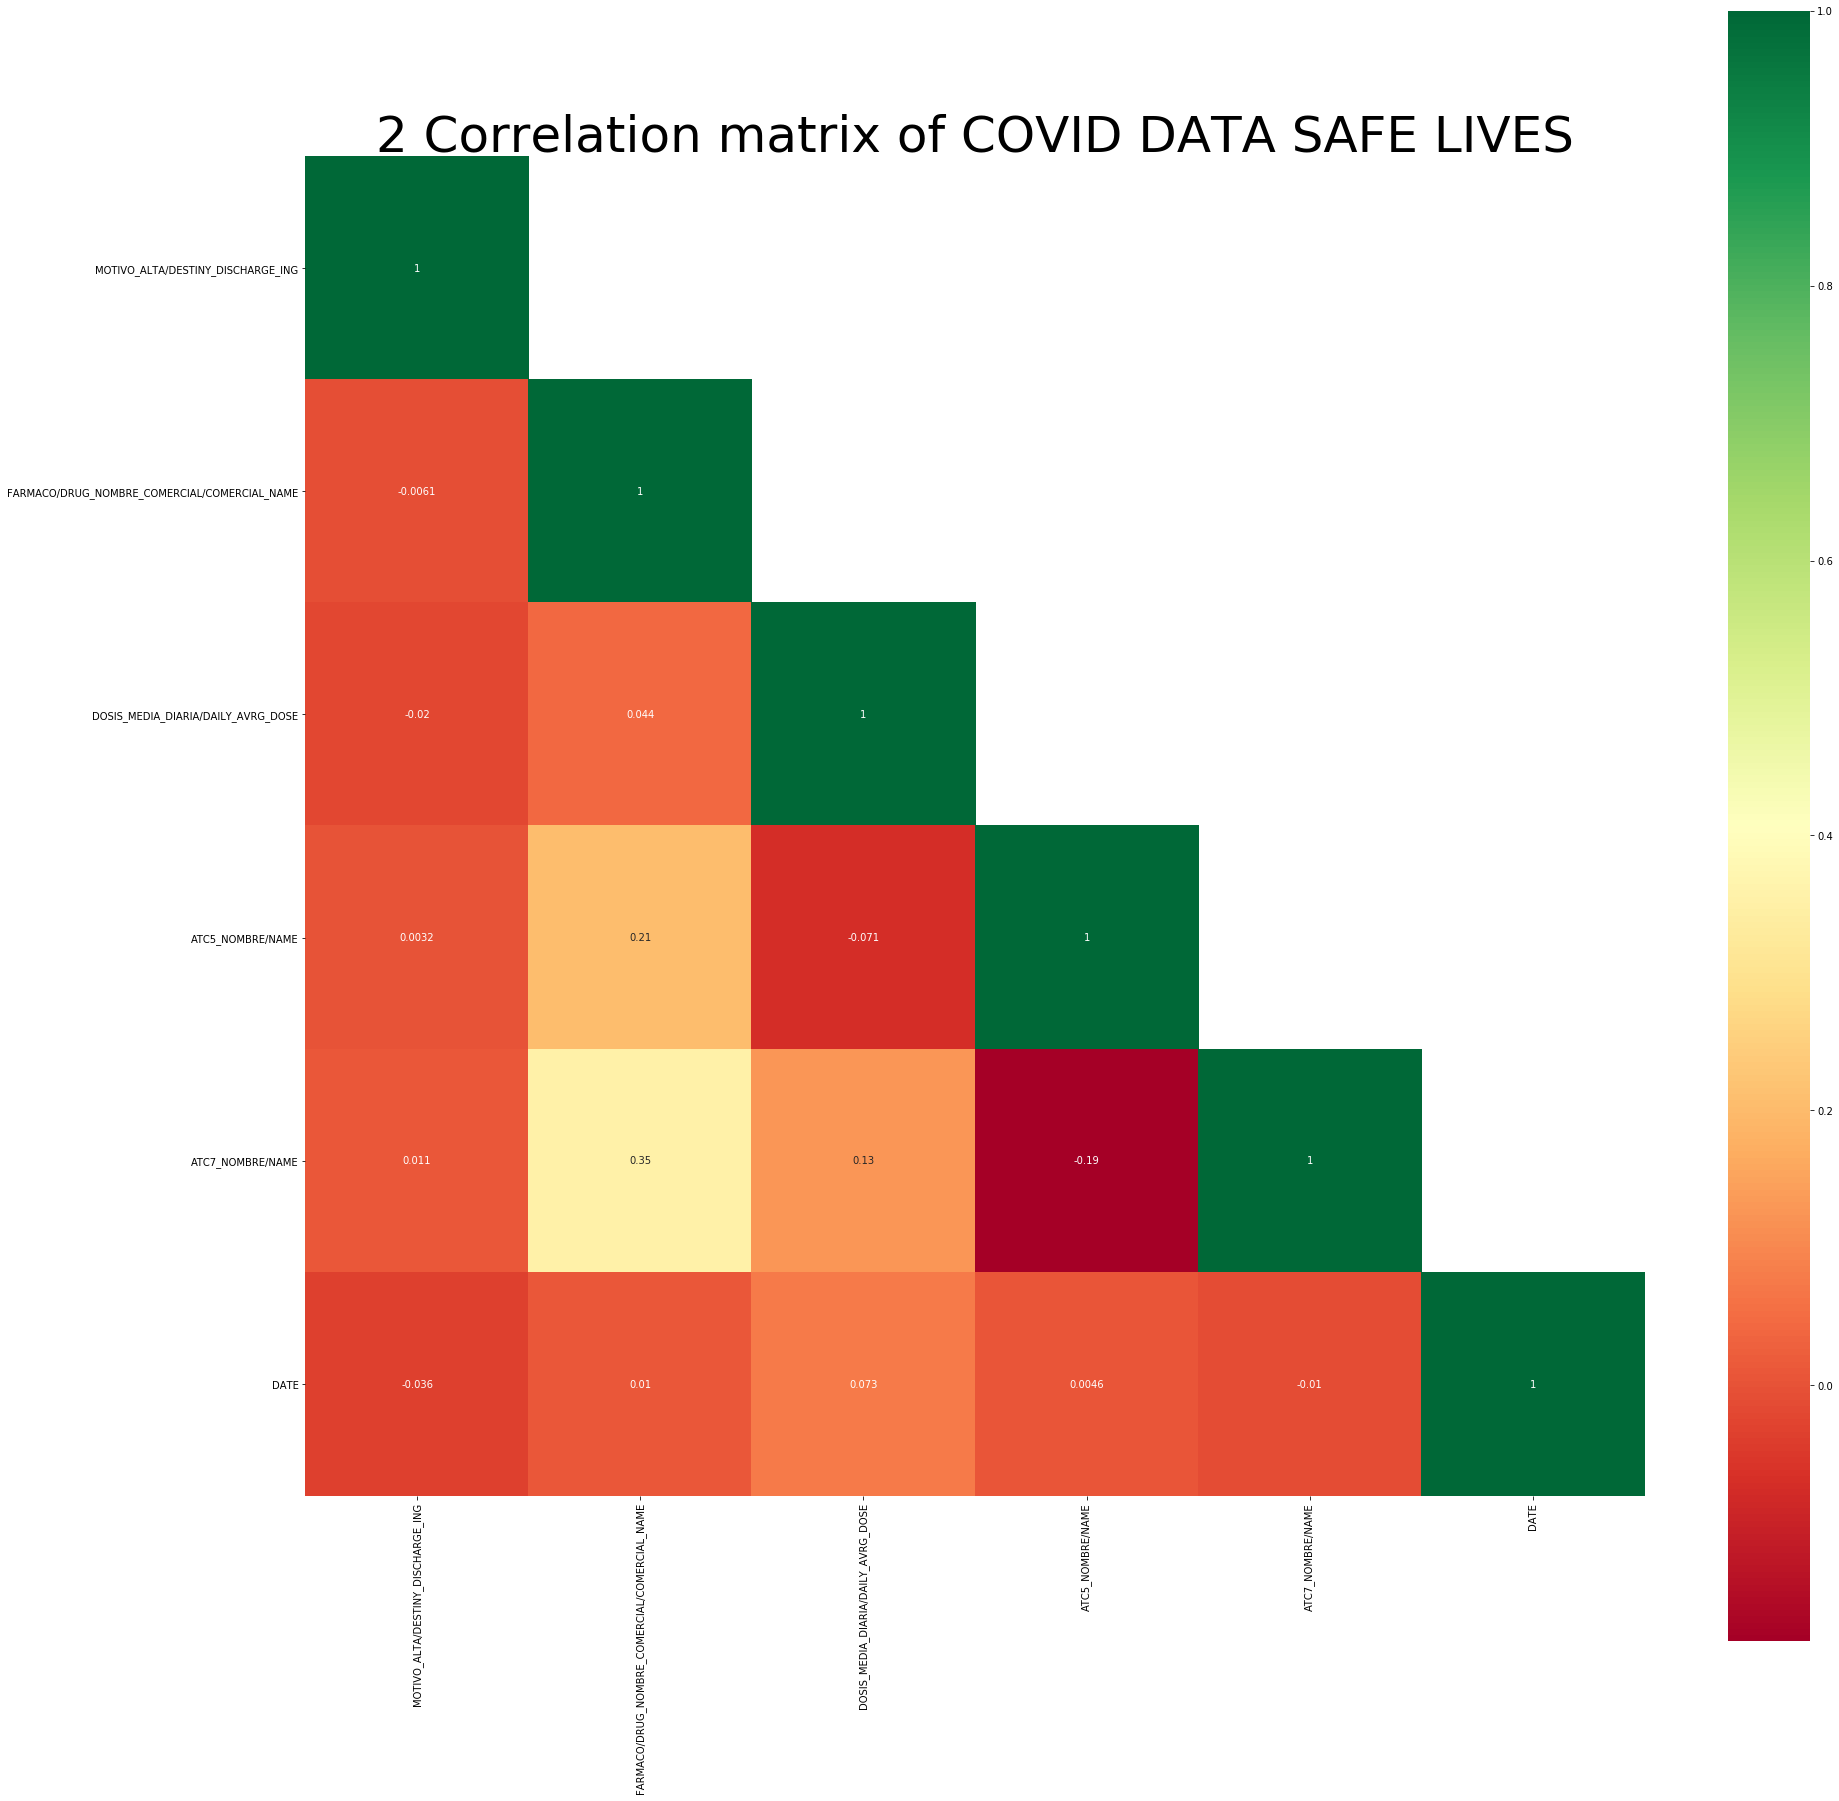

In [30]:
plt.figure(figsize=(30,30))
sns.heatmap(result.corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(result.corr(), k=1))
plt.title("2 Correlation matrix of COVID DATA SAFE LIVES",fontsize=50)
plt.show()

As expected there is no relationship between these variables.

### General

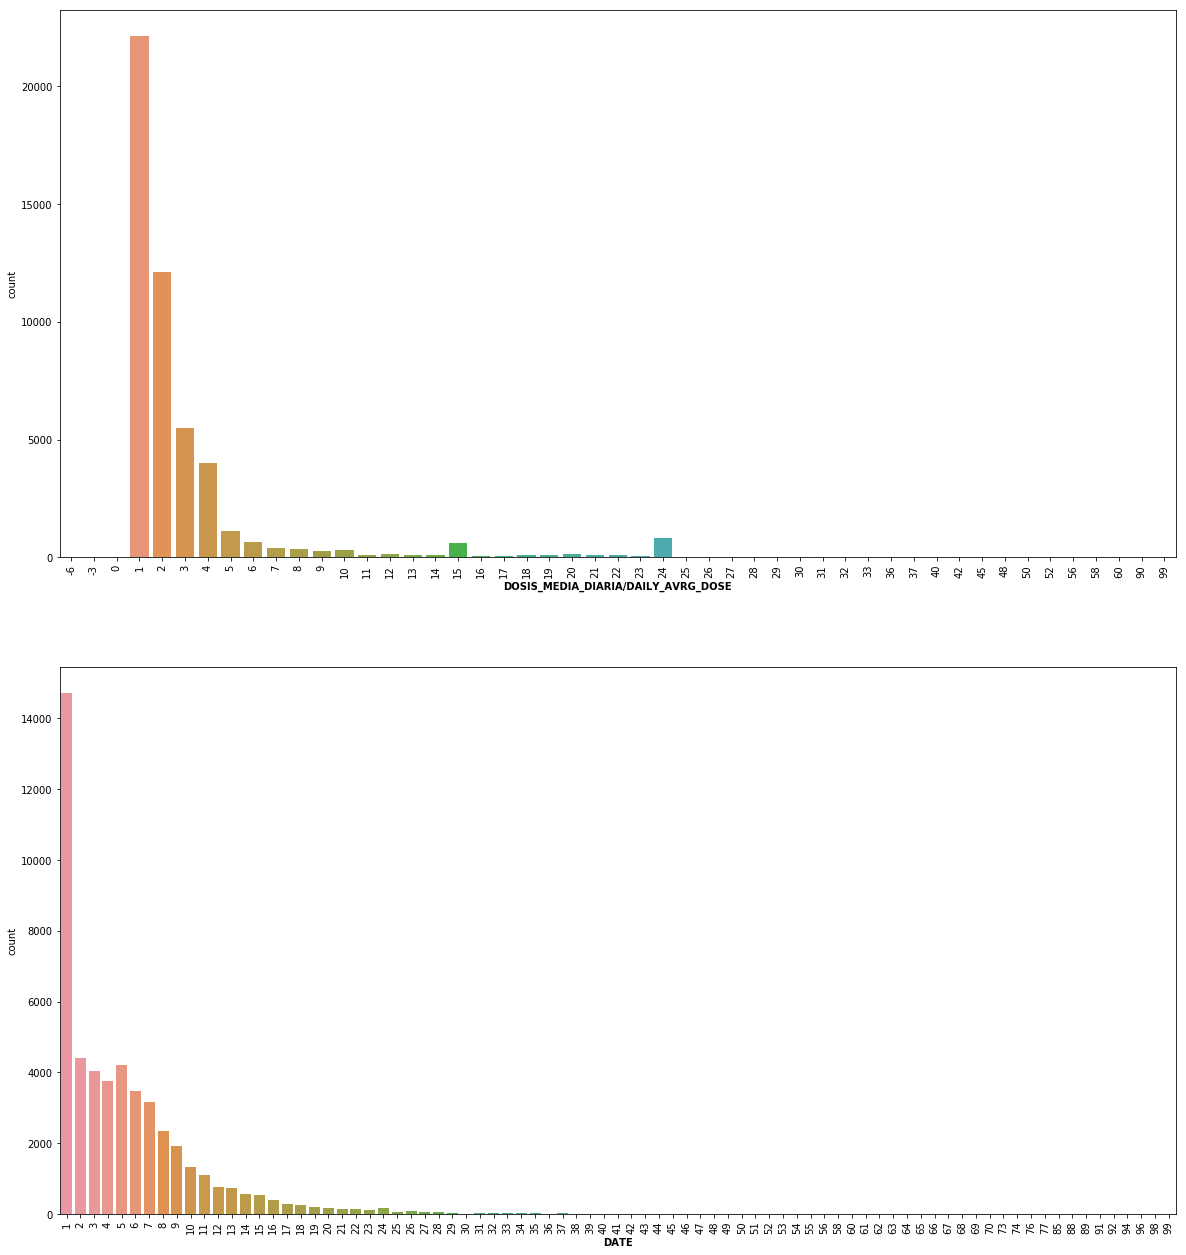

In [31]:
col_numeric = list(result.select_dtypes(include = "int64"))
# visualizing the other categorical variables
plt.figure(figsize=(20,300))
for i,col in enumerate(col_numeric, start=1):
    plt.subplot(25,1,i)
    plt.xticks(rotation=90)
    sns.countplot(result[col])
    plt.xlabel(col, fontsize=10,fontweight="bold")
plt.show()

We see that there are negative numbers in the average daily dose in which we interpret as human error since there can be no negative doses. As for the average dose 0, we will interpret it as a very small dose 0 <1.

In [32]:
(result['DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE'].values < 0).any()

True

In [33]:
# We eliminate these analyzes of negative values (exactly 2 tests)
result = result[result['DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE'] > 0]

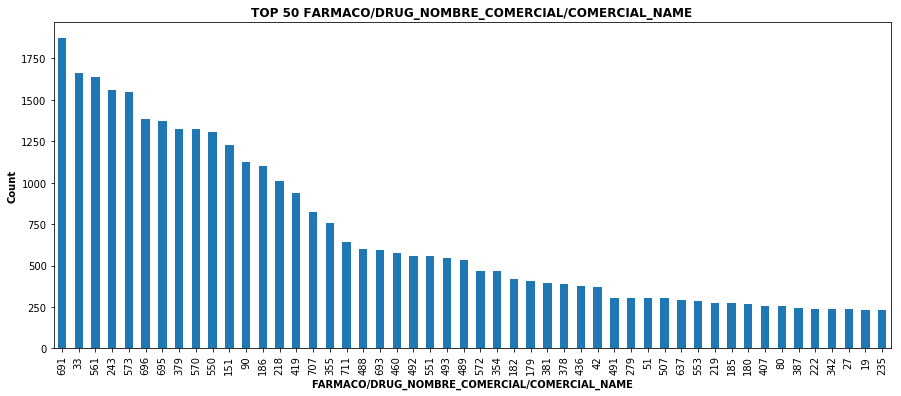

In [34]:
# visualizing the FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME
plt.figure(figsize=(15,6))
top50 = result["FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME"].value_counts().sort_values(ascending=False).head(50).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("TOP 50 FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME", fontweight="bold")
plt.show()

In [35]:
for col_name in result.columns:
    print(result[col_name].value_counts(normalize=True).head(10) * 100)

1    73.395552
2    22.390562
4     2.593782
3     1.496879
0     0.123225
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
691    3.785629
33     3.351312
561    3.304850
243    3.153344
573    3.129103
696    2.797810
695    2.771549
379    2.678626
570    2.672565
550    2.642264
Name: FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME, dtype: float64
1     44.686181
2     24.442963
3     11.059936
4      8.124760
5      2.298851
24     1.654445
6      1.337293
15     1.246389
7      0.840353
8      0.733289
Name: DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE, dtype: float64
239    12.740642
22      6.809688
202     6.314769
132     4.646183
130     4.141163
145     4.070460
61      3.959356
237     3.918954
20      3.666444
128     3.597762
Name: ATC5_NOMBRE/NAME, dtype: float64
156    10.948831
325     6.809688
167     5.831970
99      4.809810
40      4.506798
315     3.773509
219     3.650284
322     3.573521
106     3.038200
359     2.642264
Name: ATC7_NOMBRE/NAME, dtype: float64
1     2

MOTIVO_ALTA/DESTINY_DISCHARGE_ING: mayoría alta DOMICILIARIA
    
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME: top 5 más usados SUERO ClNa 100 mL I.V.(691), ALCOHOL 70§ 1L(33), OXIGENO PLANTA(561) corresponde a fármacos de primera necesidad y DOLQUINE comp 200 mg(243), PARACETAMOL sol 1 g/100 mL(573) como medicamentos.

DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE: 45,07% solo 1 dosis y pocos superan las media de 5 dosis diarias.

ATC5_NOMBRE/NAME: top 3 SOLUCIONES QUE AFECTAN EL BALANCE ELECTROLÖTICO(239)[Equilibrar la cantidad de agua en su cuerpo] ANILIDAS(22)[Paracetamol] y OTROS ANTIS\x90PTICOS Y DESINFECTANTES(202)

ATC7_NOMBRE/NAME: top 3 ELECTROLITOS(156), PARACETAMOL(325) y ETANOL(167)

DATE: 29,10% solo un tratamiento

In [36]:
print("ATC7_NOMBRE/NAME:",result['ATC7_NOMBRE/NAME'].nunique())
print("ATC5_NOMBRE/NAME",result['ATC5_NOMBRE/NAME'].nunique())

ATC7_NOMBRE/NAME: 418
ATC5_NOMBRE/NAME 253


In [37]:
#Al parecer ATC7 es más preciso que la clasificación ATC5 por lo que nos quedamos con ATC7_NOMBRE/NAME.
result.drop(['ATC5_NOMBRE/NAME'],axis=1, inplace=True)

In [38]:
s_filter = result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']<2
e_filter =(result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==3 )+ (result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==4)
f_filter = result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==2

### Sanados

In [39]:
for col_name in result[s_filter].columns:
    print(result[s_filter][col_name].value_counts(normalize=True).head(10) * 100)

1    99.83239
0     0.16761
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
691    4.124306
33     3.690169
561    3.670935
243    3.478595
573    3.407155
695    3.038962
696    3.014233
570    3.008738
379    2.937297
550    2.929054
Name: FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME, dtype: float64
1     44.990933
2     24.155081
3     10.776502
4      8.435456
5      2.209155
24     1.824477
15     1.445293
6      1.184261
7      0.816069
8      0.752871
Name: DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE, dtype: float64
156    11.664011
325     7.569929
167     6.451613
99      5.140957
40      4.750783
219     4.074848
315     3.937462
322     3.830302
106     3.192834
359     3.000495
Name: ATC7_NOMBRE/NAME, dtype: float64
1     27.496291
5      9.114140
2      8.064516
4      7.891411
3      7.877672
6      7.817223
7      7.069847
8      5.135462
9      4.217728
10     2.882343
Name: DATE, dtype: float64


MOTIVO_ALTA/DESTINY_DISCHARGE_ING: mayoría alta DOMICILARIA
    
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME: N

DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE: N

ATC7_NOMBRE/NAME: N

DATE: N

In [40]:
for col_name in result[e_filter].columns:
    print(result[e_filter][col_name].value_counts(normalize=True).head(10) * 100)

4    63.407407
3    36.592593
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
691    3.753086
243    3.358025
573    3.209877
379    3.160494
33     3.111111
90     2.962963
695    2.814815
550    2.617284
561    2.567901
151    2.567901
Name: FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME, dtype: float64
1     47.654321
2     24.987654
3     11.012346
4      7.604938
5      1.876543
6      1.283951
24     0.987654
7      0.839506
14     0.592593
10     0.493827
Name: DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE, dtype: float64
156    10.814815
325     6.962963
167     5.481481
40      4.938272
315     3.753086
99      3.753086
219     3.456790
36      3.209877
322     2.962963
372     2.666667
Name: ATC7_NOMBRE/NAME, dtype: float64
1     37.234568
2      9.382716
5      8.493827
3      7.753086
6      6.419753
4      5.333333
7      4.444444
8      4.098765
9      3.111111
12     2.469136
Name: DATE, dtype: float64


MOTIVO_ALTA/DESTINY_DISCHARGE_ING: mayoría 70,34% alta TRASLADO A HOSPITAL 
    
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME: mayor uso de PARACETAMOL sol 1 g/100 mL(573) que DOLQUINE comp 200 mg(243).

DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE: N

ATC7_NOMBRE/NAME: N

DATE: 4 días dentro del top 3

In [41]:
for col_name in result[f_filter].columns:
    print(result[f_filter][col_name].value_counts(normalize=True).head(10) * 100)

2    100.0
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
691    2.679538
33     2.282569
561    2.237459
573    2.201371
507    2.174305
696    2.138217
243    2.047997
151    2.029953
695    1.885601
186    1.759293
Name: FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME, dtype: float64
1     43.143270
2     25.288704
3     11.999278
4      7.199567
5      2.670516
6      1.849513
24     1.217972
10     0.965355
7      0.920245
15     0.757849
Name: DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE, dtype: float64
156    8.625045
325    4.285457
99     3.915554
167    3.861422
40     3.626850
315    3.238903
372    3.022375
322    2.841934
106    2.625406
280    2.490076
Name: ATC7_NOMBRE/NAME, dtype: float64
1     35.691086
2     11.656442
3      9.193432
4      7.019127
5      6.405630
7      4.429809
6      4.411765
8      3.473475
9      2.923132
10     2.075063
Name: DATE, dtype: float64


FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME: DOLQUINE comp 200 mg(243) es más usado que OXIGENO PLANTA(561).

DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE: N

ATC7_NOMBRE/NAME: N

DATE: N

## Creating Dependent and Independent Variables

In [42]:
result.applymap(str)
result.applymap(str).iloc[0,0]
result = result.applymap(str)
X = result.drop(['MOTIVO_ALTA/DESTINY_DISCHARGE_ING'],axis=1)
test_features = X.columns.to_list()
# dependent variable
y = result['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']    

## Splitting data into train test data

In [43]:
# splitting into train and test data
# I will train using 90% of the data to enhanced accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Modelling

## Decision Trees

In [44]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)*100
print('Decision Tree Classifier Training Accuracy:', score,'%')

Decision Tree Classifier Training Accuracy: 74.16683498283176 %


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0536744 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0536744 to fit



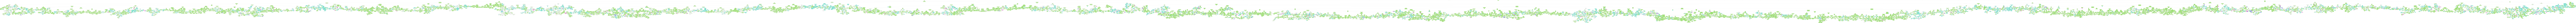

In [45]:
tree.export_graphviz(model, out_file = '2covid_decisiontree.dot')
dotfile = StringIO()
tree.export_graphviz(model, out_file=dotfile,filled = True, rounded = True, 
                    feature_names = test_features, class_names = sorted(y.unique()), label = 'all')
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png('2covid_tree.png')
Image(graph.create_png())


## Random Forest Classifier

In [46]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(X_train,y_train)
predictions = forest.predict(X_test)
score = accuracy_score(y_test,predictions)*100
print('Random Forest Classifier Training Accuracy:', score,'%')

Random Forest Classifier Training Accuracy: 74.12643910321147 %


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.066022 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.066022 to fit



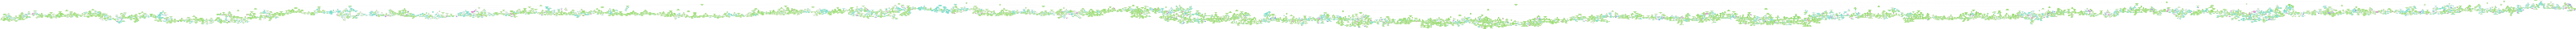

In [47]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]
export_graphviz(tree, out_file = dot_data, filled = True, rounded = True, 
                    feature_names = test_features, class_names = sorted(y.unique()), label = 'all', special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('2covid_forest.png')
Image(graph.create_png())